In [1]:
pip install pulp

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [3]:
from pulp import *
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [4]:
pip install plotnine

Note: you may need to restart the kernel to use updated packages.


In [5]:
# plot
from plotnine import *
import plotnine

In [3]:
# Import module for k-protoype cluster
from kmodes.kprototypes import KPrototypes

In [58]:
# Memasukan data set DAC
df_buku=pd.read_csv('D://Ada Kuliah//Data Mining//UAS//scaling_novel_3.csv')
df_buku

,judul,harga,terjual,genre,kota_toko
0,Petualangan Sherlock Holmes,2.115604,-0.382710,adventure,KAB. BANTUL
1,MOTIVASI MUSLIMAH : THE GREAT SHALIHA,-0.221688,-0.248504,Religi,KOTA DEPOK
2,"MY HUSBAND MY CEO, PERFECT HUSBAND, LECTURER H...",-0.103842,-0.342095,romance,KOTA JAKARTA BARAT
3,Pene000it Indoliterasi - Sherlock Holmes The C...,2.115604,-0.580489,adventure,KAB. BANTUL
4,My Lecturer My Husband - GITLICIOUS,-0.899307,2.589262,romance,KAB. BEKASI
...,...,...,...,...,...
86,INDIGO Stories,-0.869845,-0.206123,adventure,KOTA YOGYAKARTA
87,WHAT TO SAY NEXT by Julie Buxbaum,0.245770,-0.534576,romance,KAB. PONOROGO
88,IPA & IPS (chachaii_),0.175062,-0.490429,comedy,KOTA DEPOK
89,Renata - Hytrrahmi,0.328263,-0.418028,adventure,KOTA TANGERANG SELATAN


In [59]:
# menseleksi data
df_buku = df_buku.drop(['judul'], axis=1)
df_buku

,harga,terjual,genre,kota_toko
0,2.115604,-0.382710,adventure,KAB. BANTUL
1,-0.221688,-0.248504,Religi,KOTA DEPOK
2,-0.103842,-0.342095,romance,KOTA JAKARTA BARAT
3,2.115604,-0.580489,adventure,KAB. BANTUL
4,-0.899307,2.589262,romance,KAB. BEKASI
...,...,...,...,...
86,-0.869845,-0.206123,adventure,KOTA YOGYAKARTA
87,0.245770,-0.534576,romance,KAB. PONOROGO
88,0.175062,-0.490429,comedy,KOTA DEPOK
89,0.328263,-0.418028,adventure,KOTA TANGERANG SELATAN


In [60]:
# boxplot
import seaborn as sns

<AxesSubplot:xlabel='harga'>

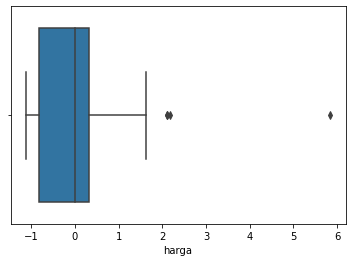

In [61]:
# membuat boxplot
sns.boxplot(x='harga', data=df_buku)

<AxesSubplot:xlabel='terjual'>

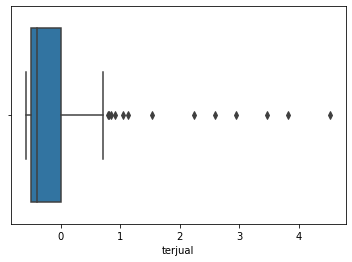

In [62]:
# membuat boxplot
sns.boxplot(x='terjual', data=df_buku)

In [63]:
# aktifkan packages
import pandas as pd
from kmodes.kprototypes import KPrototypes

In [64]:
df_buku

,harga,terjual,genre,kota_toko
0,2.115604,-0.382710,adventure,KAB. BANTUL
1,-0.221688,-0.248504,Religi,KOTA DEPOK
2,-0.103842,-0.342095,romance,KOTA JAKARTA BARAT
3,2.115604,-0.580489,adventure,KAB. BANTUL
4,-0.899307,2.589262,romance,KAB. BEKASI
...,...,...,...,...
86,-0.869845,-0.206123,adventure,KOTA YOGYAKARTA
87,0.245770,-0.534576,romance,KAB. PONOROGO
88,0.175062,-0.490429,comedy,KOTA DEPOK
89,0.328263,-0.418028,adventure,KOTA TANGERANG SELATAN


In [65]:
# Get the position of categorical columns
catColumnsPos = [df_buku.columns.get_loc(col) for col in list(df_buku.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df_buku.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['genre', 'kota_toko']
Categorical columns position  : [2, 3]


In [66]:
# Convert dataframe to matrix 
dfMatrix = df_buku.to_numpy() 
dfMatrix 

array([[2.115604332, -0.382710337, 'adventure', 'KAB. BANTUL'],
       [-0.221688407, -0.248503629, 'Religi', 'KOTA DEPOK'],
       [-0.103841714, -0.342095149, 'romance', 'KOTA JAKARTA BARAT'],
       [2.115604332, -0.580488643, 'adventure', 'KAB. BANTUL'],
       [-0.89930689, 2.58926189, 'romance', 'KAB. BEKASI'],
       [0.147760975, -0.018939524, 'romance', 'KOTA DEPOK'],
       [1.431111458, -0.299714084, 'romance', 'KAB. TANGERANG'],
       [0.112210556, -0.343861027, 'adventure', 'KOTA JAKARTA BARAT'],
       [0.332191049, -0.101935777, 'romance', 'KOTA JAKARTA SELATAN'],
       [0.42941457, 3.825376304, 'romance', 'KAB. TANGERANG'],
       [0.234967527, 0.528482574, 'romance', 'KOTA DEPOK'],
       [0.178990348, 0.848106444, 'romance', 'KAB. TANGERANG'],
       [0.295854985, 1.049416506, 'romance', 'KAB. TANGERANG'],
       [0.288980595, -0.036598301, 'adventure', 'KOTA DEPOK'],
       [0.338083384, 3.472200757, 'adventure', 'KOTA TANGERANG SELATAN'],
       [0.29330164, 0.706

In [79]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 5):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4


In [80]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 5), 'Cost':cost})
df_cost.head()

,Cluster,Cost
0,1,241.161154
1,2,170.933355
2,3,124.015057
3,4,97.298417


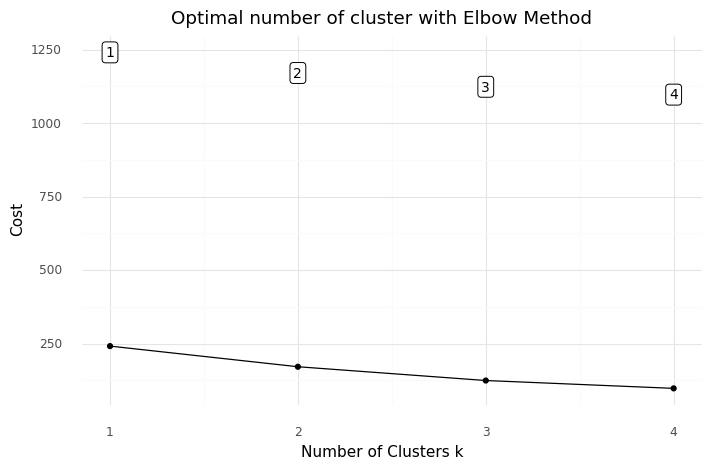

<ggplot: (126004312354)>

In [81]:
# menampilkan plot elbow
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [84]:
# Clustering KPrototypes
model=KPrototypes(n_clusters=3,verbose=2,max_iter=20)
klaster=model.fit_predict(dfMatrix,categorical=[2, 3])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 9, ncost: 176.94039546163617
Run: 1, iteration: 2/20, moves: 8, ncost: 174.60011099961721
Run: 1, iteration: 3/20, moves: 5, ncost: 173.96600599220815
Run: 1, iteration: 4/20, moves: 2, ncost: 173.9312418611058
Run: 1, iteration: 5/20, moves: 0, ncost: 173.9312418611058
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 16, ncost: 130.65672293877063
Run: 2, iteration: 2/20, moves: 7, ncost: 126.6220056954434
Run: 2, iteration: 3/20, moves: 2, ncost: 125.65358594326774
Run: 2, iteration: 4/20, moves: 0, ncost: 125.65358594326774
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 10, ncost: 161.37959317672488
Run: 3, iteration: 2/20, moves: 4, ncost: 158.71184706906058
Run: 3, iteration: 3/20, moves: 0, ncost: 158.71184706906058
Init: initializing centroids


In [85]:
# membuat centroid
print(model.cluster_centroids_)

[['0.14592780400000005' '2.590046724555556' 'romance' 'KAB. TANGERANG']
 ['-0.278082623150685' '-0.27039567521917807' 'romance' 'KOTA DEPOK']
 ['2.109631250444445' '-0.3968373588888892' 'romance' 'KAB. BANTUL']]


In [86]:
# menampilkan hasil cluster
cluster_dict=[]
for c in klaster:
    cluster_dict.append(c)

In [88]:
# menampilkan hasil cluster dengan data frame baru
df_buku['cluster']=cluster_dict
df_buku

,harga,terjual,genre,kota_toko,cluster
0,2.115604,-0.382710,adventure,KAB. BANTUL,2
1,-0.221688,-0.248504,Religi,KOTA DEPOK,1
2,-0.103842,-0.342095,romance,KOTA JAKARTA BARAT,1
3,2.115604,-0.580489,adventure,KAB. BANTUL,2
4,-0.899307,2.589262,romance,KAB. BEKASI,0
...,...,...,...,...,...
86,-0.869845,-0.206123,adventure,KOTA YOGYAKARTA,1
87,0.245770,-0.534576,romance,KAB. PONOROGO,1
88,0.175062,-0.490429,comedy,KOTA DEPOK,1
89,0.328263,-0.418028,adventure,KOTA TANGERANG SELATAN,1


In [89]:
# cluster 1
df_buku[df_buku['cluster']==0].head(10)

,harga,terjual,genre,kota_toko,cluster
4,-0.899307,2.589262,romance,KAB. BEKASI,0
9,0.429415,3.825376,romance,KAB. TANGERANG,0
12,0.295855,1.049417,romance,KAB. TANGERANG,0
14,0.338083,3.472201,adventure,KOTA TANGERANG SELATAN,0
17,0.234968,1.529735,romance,KOTA DEPOK,0
19,0.012041,1.134179,adventure,KAB. TANGERANG,0
22,0.328263,2.942437,adventure,KOTA TANGERANG SELATAN,0
29,1.506730,4.531727,romance,KOTA TANGERANG SELATAN,0
39,-0.932697,2.236086,comedy,KAB. BEKASI,0


In [90]:
# cluster 2
df_buku[df_buku['cluster']==1].head(10)

,harga,terjual,genre,kota_toko,cluster
1,-0.221688,-0.248504,Religi,KOTA DEPOK,1
2,-0.103842,-0.342095,romance,KOTA JAKARTA BARAT,1
5,0.147761,-0.018940,romance,KOTA DEPOK,1
7,0.112211,-0.343861,adventure,KOTA JAKARTA BARAT,1
8,0.332191,-0.101936,romance,KOTA JAKARTA SELATAN,1
10,0.234968,0.528483,romance,KOTA DEPOK,1
11,0.178990,0.848106,romance,KAB. TANGERANG,1
13,0.288981,-0.036598,adventure,KOTA DEPOK,1
15,0.293302,0.706836,adventure,KOTA DEPOK,1
16,-0.457382,-0.585786,romance,KOTA DEPOK,1


In [91]:
# cluster 3
df_buku[df_buku['cluster']==2].head(10)

,harga,terjual,genre,kota_toko,cluster
0,2.115604,-0.382710,adventure,KAB. BANTUL,2
3,2.115604,-0.580489,adventure,KAB. BANTUL,2
6,1.431111,-0.299714,romance,KAB. TANGERANG,2
34,1.094266,-0.456877,religi,KOTA YOGYAKARTA,2
60,1.624576,-0.276758,romance,KOTA TANGERANG SELATAN,2
62,5.847416,-0.541639,adventure,KAB. BANTUL,2
66,1.557306,-0.091341,romance,KOTA JAKARTA BARAT,2
81,1.016448,-0.501024,romance,KAB. TANGERANG,2
83,2.184348,-0.440984,romance,KOTA TANGERANG SELATAN,2


In [93]:
# export data fram
df_buku.to_csv(r'D:\Ada Kuliah\Data Mining\UAS\buku_cluster.csv', index = False)

In [99]:
# Cluster interpretation
df_buku.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
df_buku_profilisasi=df_buku.groupby('cluster').agg(
    {
        
        'harga': 'mean',
        'terjual': 'mean',
        'genre': lambda x: x.value_counts().index[0],
        'kota_toko': lambda x: x.value_counts().index[0],
    }
).reset_index()

In [103]:
#
df_buku_profilisasi

,cluster,harga,terjual,genre,kota_toko
0,0,0.145928,2.590047,romance,KAB. TANGERANG
1,1,-0.278083,-0.270396,romance,KOTA DEPOK
2,2,2.109631,-0.396837,romance,KAB. BANTUL


In [105]:
# export data profilisasi
df_buku_profilisasi.to_csv(r'D:\Ada Kuliah\Data Mining\UAS\buku_profilisasi.csv', index = False)